* Source: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
* Source: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_selection/_rfe.py

In [65]:
import numpy as np
from sklearn.svm import SVC

class SVM_RFE():
    def __init__(self, n_features_to_select):
        self.n_features_to_select = n_features_to_select

    def fit(self, X, y):
        n_features_to_select = self.n_features_to_select
        n_features = X.shape[1]
        if n_features_to_select is None:
            n_features_to_select = n_features
            
        support_ = np.ones(n_features, dtype=bool)
        ranking_ = np.ones(n_features, dtype=int)
    
        # np.sum(support_) is the number of selected features.
        # It starts at n_features and decreases every iteration.
        while np.sum(support_) > n_features_to_select:
            
            # Remaining features, represented with a list of indices.
            features = np.arange(n_features)[support_]

            # Declare and train the SVM
            estimator = SVC(kernel="linear", C=1)
            estimator.fit(X[:, features], y)

            # Get importance and rank them
            # TODO: Use support_vectors_ directly, and/or find out why the **2 is nesscesary.
            importances = estimator.coef_ ** 2
            ranks = np.argsort(importances)

            # Flatten ranks, required for Multi-Class Classification.
            # For now we simply ignoring all but the first class to class comparisson.
            # TODO: Choose the feature that appears most times in the first position.
            ranks = np.ravel(ranks)

            # Eliminate the worse feature
            selected_feature = features[ranks[0]]
            support_[selected_feature] = False
            ranking_[np.logical_not(support_)] += 1

        # Set final attributes
        self.n_features_ = support_.sum()
        self.support_ = support_
        self.ranking_ = ranking_

        return self


In [66]:
f = np.array([2, 5, 8])
x = np.array([[2, 1, 0], [2, 0, 1]])
f[np.ravel(x)]

array([8, 5, 2, 8, 2, 5])

# Testing

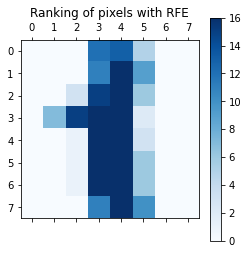

In [67]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Plot one image
plt.matshow(digits.images[1], cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [68]:
# Create the RFE object and rank each pixel
rfe = SVM_RFE(n_features_to_select=1)
rfe.fit(X, y)

# Each pixel is ranked from position 1 (most important) to position 64 (least important)
rfe.ranking_

array([64, 63, 48, 22, 33,  6, 20, 55, 54, 50, 37, 10, 27, 35, 31, 52, 45,
       36, 41,  9,  4,  8, 51, 53, 49, 39, 34, 21,  3, 30, 15, 60, 62,  7,
       14,  1, 12, 24, 19, 56, 57, 32,  2, 17, 40, 11, 23, 58, 61, 46,  5,
       29, 18, 26, 43, 38, 59, 47, 42, 13, 28, 25, 16, 44])

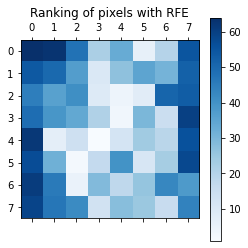

In [69]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()